# Running SCellBOW clustering 

In [1]:
import SCellBOW as sb
import scanpy as sc
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/namratab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Import Dataset

In [2]:
adata_all = sc.read('data/pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')
adata = adata_all.raw.to_adata()
adata

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 14693 × 24516
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

# SCellBOW Pretrained model

In [3]:
# preprocess source data
adata_source = adata[adata.obs["sample"] == 'Muraro']
adata_source.var_names_make_unique()
sc.pp.filter_cells(adata_source, min_genes=200)
sc.pp.filter_genes(adata_source, min_cells=20)

sc.pp.normalize_total(adata_source, target_sum=1e4)
sc.pp.log1p(adata_source)
    
sc.pp.highly_variable_genes(adata_source, n_top_genes = 1000)
adata_source = adata_source[:, adata_source.var.highly_variable]

sc.pp.scale(adata_source, max_value=10)
adata_source

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 2126 × 1000
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [4]:
# invoke pretraining model
sb.SCellBOW_pretrain(adata_source, "pancreas", vec_size=300, n_worker=1, iter=20)

[ 2022-12-30 09:56:08.785393 ] The path to save directory is ./pancreas/
[ 2022-12-30 09:56:08.785430 ] Creating the source model.
[ 2022-12-30 09:56:08.798686 ] Creating the corpus.


  0%|          | 0/2126 [00:00<?, ?it/s]

[ 2022-12-30 09:56:10.430869 ] Corpus created with size = 2126
[ 2022-12-30 09:56:10.430895 ] Tagging the corpora.
[ 2022-12-30 09:56:18.406768 ] All corpuses tagged with length 2126
[ 2022-12-30 09:56:18.406846 ] Inititalize the SCellBOW source model.
[ 2022-12-30 09:56:18.406858 ] INFO - SCellBOW: vector size = 300
[ 2022-12-30 09:56:18.406867 ] INFO - SCellBOW: initial learning rate = 0.025
[ 2022-12-30 09:56:18.406880 ] INFO - SCellBOW: min_alpha = 0.00025
[ 2022-12-30 09:56:18.406890 ] INFO - SCellBOW: min_count = 1
[ 2022-12-30 09:56:18.406899 ] INFO - SCellBOW: number of cpu = 1
[ 2022-12-30 09:56:18.407376 ] Building vocabulary.
[ 2022-12-30 09:56:18.860204 ] Vocabulary built.
[ 2022-12-30 09:56:18.860259 ] Start training the neural network.
[ 2022-12-30 09:58:17.645524 ] Training SCellBOW source model finished.
[ 2022-12-30 09:58:17.652110 ] Model saved in directory  ./pancreas/
[ 2022-12-30 09:58:17.699460 ] Source model created!


# SCellBOW Clustering

In [5]:
# preprocess target data
adata_target = adata[adata.obs["sample"] == 'Wang']
adata_target.var_names_make_unique()

sc.pp.filter_cells(adata_target, min_genes=200)
sc.pp.filter_genes(adata_target, min_cells=20)

sc.pp.normalize_total(adata_target, target_sum=1e4)
sc.pp.log1p(adata_target)
    
sc.pp.highly_variable_genes(adata_target, n_top_genes = 1000)
adata.raw = adata
adata_target = adata_target[:, adata_target.var.highly_variable]

sc.pp.scale(adata_target, max_value=10)

adata_target

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 635 × 1000
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [6]:
#invoke SCellBOW cluster
adata_output = sb.SCellBOW_cluster(adata_target,'pancreas').run()

[ 2022-12-30 09:58:18.903829 ] The path to save directory is ./pancreas/
[ 2022-12-30 09:58:18.903914 ] Begin SCellBOW: transfer learning.
MinMaxScaler(feature_range=(1, 10))
[ 2022-12-30 09:58:18.914265 ] Creating the corpus.


  0%|          | 0/635 [00:00<?, ?it/s]

[ 2022-12-30 09:58:19.439166 ] Tagging the corpora for transfer learning.
[ 2022-12-30 09:58:22.091025 ] All corpuses tagged with length = 635
[ 2022-12-30 09:58:22.091095 ] Updating the vocabulary.
[ 2022-12-30 09:58:22.251719 ] Vocabulary updated.
[ 2022-12-30 09:58:22.251741 ] Start transfer learning on the neural network.
[ 2022-12-30 09:59:33.672647 ] Weights of the neural network calibrated.
[ 2022-12-30 09:59:33.672716 ] Start infering the vectors for target dataset.


  0%|          | 0/635 [00:00<?, ?it/s]

[ 2022-12-30 10:00:30.970379 ] Embedding created with shape : (635, 300)
[ 2022-12-30 10:00:30.970432 ] Start leiden clustering at resolution: 1.0


2022-12-30 10:00:33.218818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 10:00:33.218843: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[ 2022-12-30 10:00:36.551786 ] SCellBOW clustering has been successful!


In [7]:
adata_output

AnnData object with n_obs × n_vars = 635 × 1000
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'clusters_1.0'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors', 'log1p', 'hvg', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'SCellBOW_embed', 'X_embed'
    obsp: 'distances', 'connectivities'

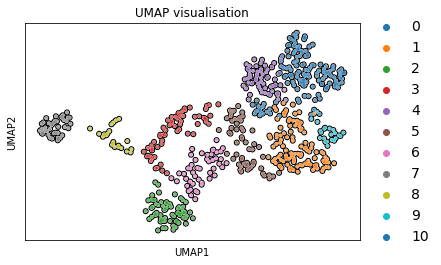

In [8]:
resolution = 1.0
with plt.rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata_output, 
               color='clusters_'+str(resolution), 
               add_outline=True, 
               legend_fontsize=14, 
               legend_fontoutline=2,
               title='UMAP visualisation', 
               size = 50,
               palette=plt.rcParams["axes.prop_cycle"],
              )